# k-Nearest Neighbor (KNN)


Classification and Regression

* Lazy learner

  * [Instance Based](https://en.wikipedia.org/wiki/Instance-based_learning)
  * Lazy because it does not try to learn a function from the training data. 
  * It memorise the pattern from the dataset


* [Nonparametric model](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)

  * distribution-free tests because no assumption of the data needing to follow a specific distribution
  * [wikipedia](https://en.wikipedia.org/wiki/Nonparametric_statistics)
  * Other examples - Decision Tree, Random Forest



Used for:

* Predict cancer is malignant or benign
* Pattern recognition
* Recommender Systems
* Computer Vision
* Gene Expression
* Protein-Protein Interaction and 3D Structure Prediction




## Disadvantages

* Not efficient on big data
* Curse of dimensionality. Very susceptible to overfitting


## Steps:

* Choose the number of $k$
* Select a distance metric
* Find the k nearest neighbors of the sample
* Assign the class label by majority vote



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

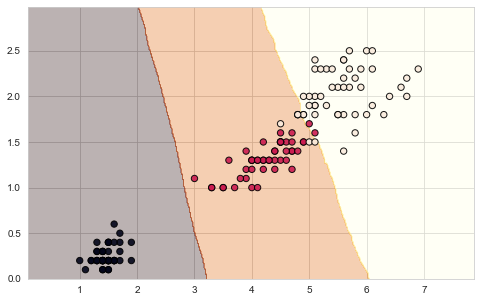

In [10]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3,)

plt.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train, s=40, alpha=0.9, edgecolors='k')

***

## DistanceMetric class documentation
[scikit-learn]()

Metrics intended for real-valued vector spaces:

| identifier	| class name	| args	| distance function |
|:- |:- |:- |:- |
|"euclidean" | 	EuclideanDistance  |   | $\sqrt{\sum(x - y)^2)}$  |  
|"manhattan" | ManhattanDistance |  | $\sum\big|x - y\big|$|  
|"chebyshev" | ChebyshevDistance |  | max${\big|x - y\big|}$ |  
|"minkowski" | MinkowskiDistance	 | p	 | $\sum(\big|x - y\big|^p)^{\frac{1}{p}}$     | 
|"wminkowski" | WMinkowskiDistance	 | p, w	 | $\sum(w\big|x - y\big|^p)^{\frac{1}{p}}$     |
|"seuclidean" | SEuclideanDistance	 | V	 | $\sqrt{\sum\frac{(x - y)^2}{V})}$     | 

Refer to documentation for more on 
* Metrics intended for two-dimensional vector spaces
* Metrics intended for integer-valued vector spaces
* Metrics intended for boolean-valued vector spaces

* User-defined distance

Source: [Rorasa's blog](https://rorasa.wordpress.com/2012/05/13/l0-norm-l1-norm-l2-norm-l-infinity-norm/)

* Mathematically a norm is a total size or length of all vectors in a vector space or matrices. 
* For simplicity, we can say that the higher the norm is, the bigger the (value in) matrix or vector is. 
* Norm may come in many forms and many names, including these popular name: Euclidean distance, Mean-squared Error, etc.
* Most of the time you will see the norm appears in a equation like this:

$\left \| x \right \|$ where $x$ can be a vector or a matrix.

* Euclidean distance

  * Most common
  * L2 norm of two vectors. 
  * In a bidimensional plane, the Euclidean distance refigures as the straight line connecting two points, and you calculate it as the square root of the sum of the squared difference between the elements of two vectors. 
  * The Euclidean distance between points (1,2) and (3,3) can be computed $\sqrt{(1-3)^2+(2-3)^2}$, which results in a distance of about 2.236.


* Manhattan distance
  * Another useful measure is the Manhattan distance
  * L1 norm of two vectors
  * Summing the absolute value of the difference between the elements of the vectors. 
  * If the Euclidean distance marks the shortest route, the Manhattan distance marks the longest route, resembling the directions of a taxi moving in a city. (The distance is also known as taxicab or city-block distance.) 
  * For instance, the Manhattan distance between points (1,2) and (3,3) is abs(1–3) and abs(2–3), which results in 3.


* Chebyshev distance
  * Takes the maximum of the absolute difference between the elements of the vectors. 
  * It is a distance measure that can represent how a king moves in the game of chess or, in warehouse logistics, the operations required by an overhead crane to move a crate from one place to another. 
  * In machine learning, the Chebyshev distance can prove useful when you have many dimensions to consider and most of them are just irrelevant or redundant (in Chebyshev, you just pick the one whose absolute difference is the largest). 
  * In the example used in previous sections, the distance is simply 2, the max between abs(1–3) and abs(2–3).

***